In [4]:
import numpy as np
import ast # for string to list 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from y2ace_funcs import *

# `ACEpotentials.jl`: Carbon datasets

## ID

In [10]:
r = np.linspace(1,8,200)
en_qe = np.loadtxt('../codefiles_Convergence-of-body-orders-in-linear-ace/datafiles/es01_dimer250.dat').T
en_qe[0] *= 0.529177 # bohr to Angstrom
en_qe[1] -= -18.03977639 * 2 # remove e1b
en_qe[1] *= 13.605703976 # Rydberg to eV

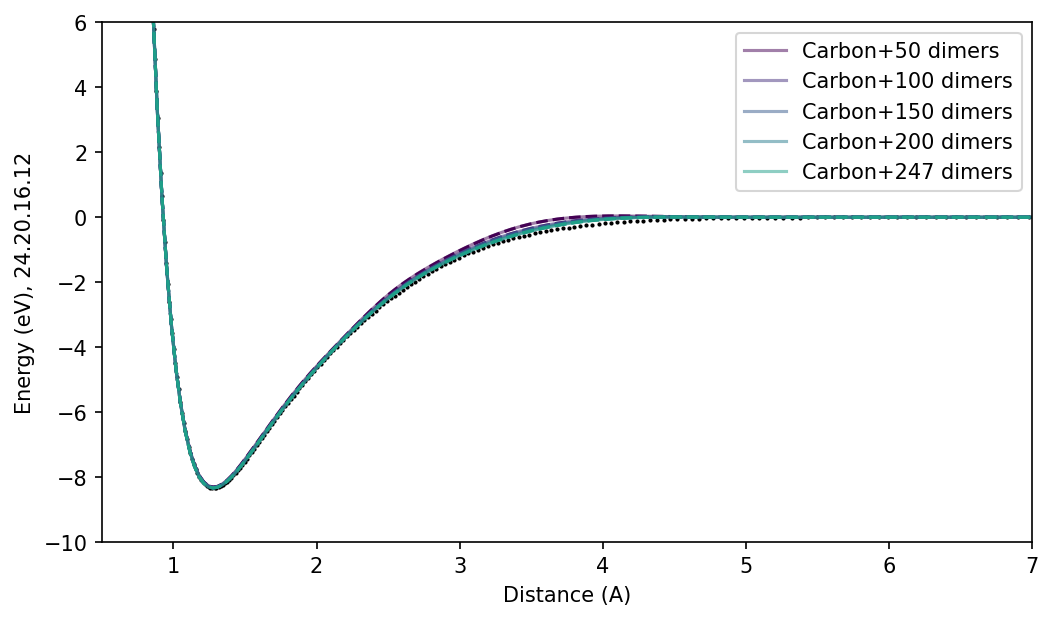

In [11]:
dsets = ['dimgen_50','dimgen_100','dimgen_150','dimgen_200','dimgen_247']
dset_labels = ['50','100','150','200','247']
jl_dims = {}
jl_puredims = {}
bases = ['24.20','24.20.16','24.20.16.12']

g, gax = plt.subplots(1, 1, figsize=(8, 4.5), dpi=150)
# g.suptitle('In-domain Carbon', fontsize=16)
for j, dset in enumerate(dsets):
    jl_dims[dset + '_' + bases[2]] = np.loadtxt(f'acejulia/{dset}/' + bases[2] + f'/ecost10.0/dimercurve.dat').T
    jl_puredims[dset + '_' + bases[2]] = np.loadtxt(f'acejulia/{dset}_purify/' + bases[2] + f'/ecost10.0/dimercurve.dat').T
    gax.plot(*jl_dims[dset + '_' + bases[2]], color=cm.viridis(0.7*j/len(dsets)), linestyle='--')
    gax.plot(*jl_puredims[dset + '_' + bases[2]], label="Carbon+"+dset_labels[j]+" dimers", color=cm.viridis(0.7*j/len(dsets)), alpha=0.5)
gax.set_ylabel('Energy (eV), ' + bases[2])
gax.set_xlim(0.5, 7)
gax.set_ylim(-10, 6)
gax.scatter(*en_qe,s=1,color='k')
gax.legend()
gax.set_xlabel('Distance (A)')

g.savefig('figures/ind_carbon_dimer.png',dpi=300,bbox_inches='tight')

## OOD

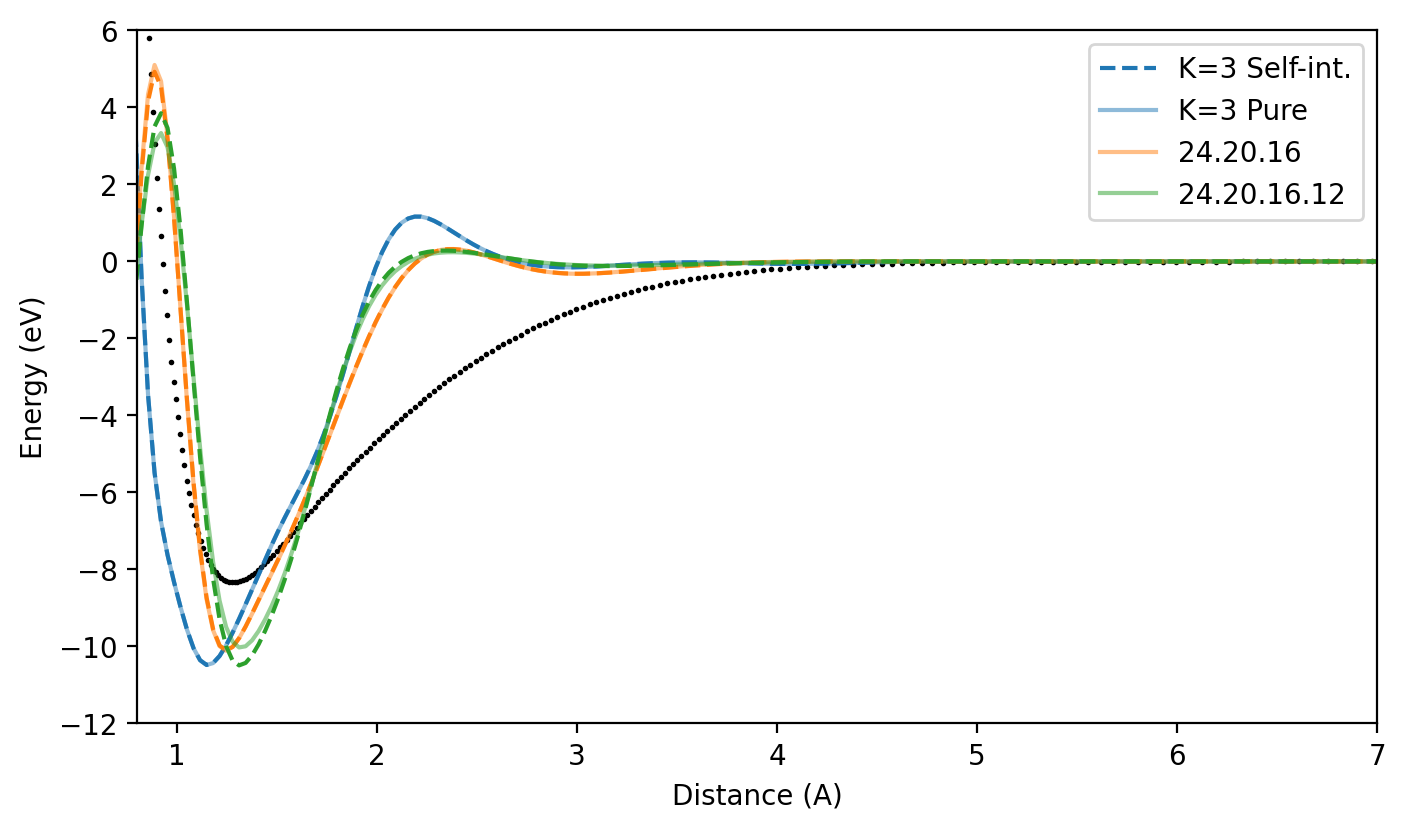

In [ ]:
basis_tags = ['24.20','24.20.16','24.20.16.12']
plotlabels = ['K=3', 'K=4', 'K=5']
# dset = 'dimgen_247'
# dimgens = ['50','100','150','200','247']
dset = 'Tr1k_n'
jl_dims = {}
jl_puredims = {}
# basis_set = '24.20.16.12'

g, gax = plt.subplots(1,1,figsize=(8,4.5),dpi=200)
# g.suptitle(f'{dset}')
# g.suptitle('Out-of-distribution Carbon', fontsize=16)
# g.subplots_adjust(top=0.95)
g.subplots_adjust(wspace=0.2)
# gax[1].set_title('Difference')
gax.set_ylabel('Energy (eV)')
gax.set_xlabel('Distance (A)')
for i,basis in enumerate(basis_tags):
    jl_dims[basis] = np.loadtxt(f'acejulia/{dset}'+'/'+basis+'/ecost10.0/dimercurve.dat').T
    jl_puredims[basis] = np.loadtxt(f'acejulia/{dset}'+'_purify/'+basis+'/ecost10.0/dimercurve.dat').T  
    if i==0:
        gax.plot(*jl_dims[basis], label=plotlabels[i]+" Self-int.", color="C"+str(i), linestyle='--')
        gax.plot(*jl_puredims[basis], label=plotlabels[i]+" Pure", color="C"+str(i), alpha=0.5)
    else:
        gax.plot(*jl_dims[basis], color="C"+str(i), linestyle='--')
        gax.plot(*jl_puredims[basis], label=plotlabels[i], color="C"+str(i), alpha=0.5)

gax.legend()
gax.scatter(*en_qe,s=1,color='k')
gax.set_xlim(0.8,7)
gax.set_ylim(-12,6)
g.savefig('figures/ood_carbon_dimer.png', dpi=300, bbox_inches='tight')

(-15.0, 6.0)

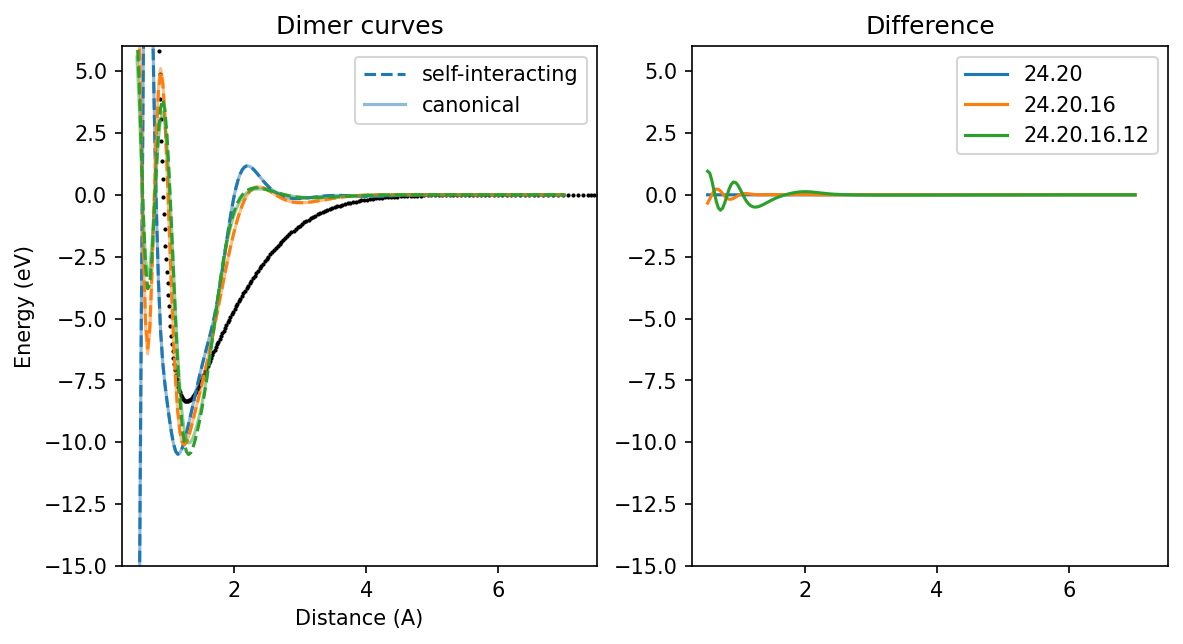

In [13]:
r = np.linspace(1,8,200)
en_qe = np.loadtxt('../codefiles_Convergence-of-body-orders-in-linear-ace/datafiles/es01_dimer250.dat').T
en_qe[0] *= 0.529177 # bohr to Angstrom
en_qe[1] -= -18.03977639 * 2 # remove e1b
en_qe[1] *= 13.605703976 # Rydberg to eV

basis_tags = ['24.20','24.20.16','24.20.16.12']
# dset = 'dimgen_247'
# dimgens = ['50','100','150','200','247']
dset = 'Tr1k_n'
jl_dims = {}
jl_puredims = {}
# basis_set = '24.20.16.12'

g, gax = plt.subplots(1,2,figsize=(9,4.5),dpi=150)
# g.suptitle(f'{dset}')
# g.suptitle('Out-of-distribution Carbon', fontsize=16)
# g.subplots_adjust(top=0.95)
g.subplots_adjust(wspace=0.2)
gax[0].set_title('Dimer curves')
gax[1].set_title('Difference')
gax[0].set_ylabel('Energy (eV)')
gax[0].set_xlabel('Distance (A)')
for i,basis in enumerate(basis_tags):
    jl_dims[basis] = np.loadtxt(f'acejulia/{dset}'+'/'+basis+'/ecost10.0/dimercurve.dat').T
    jl_puredims[basis] = np.loadtxt(f'acejulia/{dset}'+'_purify/'+basis+'/ecost10.0/dimercurve.dat').T  
    diffy = jl_dims[basis][1] - jl_puredims[basis][1]  
    if i == 0:
        gax[0].plot(*jl_dims[basis], label="self-interacting", color="C"+str(i), linestyle='--')
        gax[0].plot(*jl_puredims[basis], label="canonical", color="C"+str(i), alpha=0.5)
    else:
        gax[0].plot(*jl_dims[basis], color="C"+str(i), linestyle='--')
        gax[0].plot(*jl_puredims[basis], color="C"+str(i), alpha=0.5)
    gax[1].plot(jl_dims[basis][0], diffy, label=basis, color="C"+str(i))

for axes in gax:
    axes.set_xlim(0.3,7.5)
    # axes.set_xlabel('Distance (A)')
    # axes.set_ylabel('Energy (eV)')
    axes.legend() 
gax[0].scatter(*en_qe,s=1,color='k')
gax[0].set_ylim(-15,6)
gax[1].set_ylim(-15,6)
# g.savefig('figures/ood_carbon_dimer.png', dpi=200, bbox_inches='tight')

# `ACEpotentials.jl`: Silicon datasets

## Dataset info

In [116]:
en_si = np.loadtxt('./datasets/Si2_energy.dat').T
en_si[0,np.argmin(en_si[1])]

2.20707071

## OOD-Test (ecost50, correct r0, with pairdists)

### Coefficients

KeyError: 'Si2345'

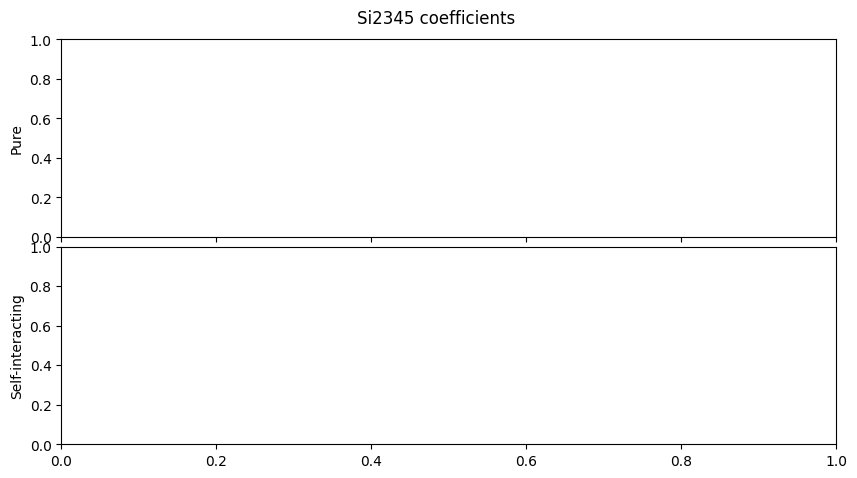

In [74]:
# Purified # 
with open('acejulia/Si_purify_OOD_coeffs.dat', 'r') as file:
    lines = file.readlines()
coeffs_pure = {'Si2': [], 'Si3': [], 'Si4': [], 'Si5': []}
for i, line in enumerate(lines):
    line_list = ast.literal_eval(line)
    if (i<2) | (i==8):
        coeffs_pure['Si2'].append(line_list)
    elif (i<4) | (i==9):
        coeffs_pure['Si3'].append(line_list)
    elif (i<6) | (i==10):
        coeffs_pure['Si4'].append(line_list)
    elif (i<8) | (i==11):
        coeffs_pure['Si5'].append(line_list)

# Self-interacting # 
with open('acejulia/Si_selfint_OOD_coeffs.dat', 'r') as file:
    lines = file.readlines()
coeffs = {'Si2': [], 'Si3': [], 'Si4': [], 'Si5': []}
for i, line in enumerate(lines):
    line_list = ast.literal_eval(line)
    if (i<2) | (i==8):
        coeffs['Si2'].append(line_list)
    elif (i<4) | (i==9):
        coeffs['Si3'].append(line_list)
    elif (i<6) | (i==10):
        coeffs['Si4'].append(line_list)
    elif (i<8) | (i==11):
        coeffs['Si5'].append(line_list)

# Checking similarity # 
dset = 'Si2345'
f,ax = plt.subplots(2,1, figsize=(10,5), dpi=100, sharex=True)
f.subplots_adjust(top=0.92, hspace=0.05); f.suptitle(f'{dset} coefficients')
ax[0].set_ylabel('Pure'); ax[1].set_ylabel('Self-interacting')
ax[0].plot(coeffs_pure[dset][2], label='24.20.16.12', color='C2')
ax[0].plot(coeffs_pure[dset][1], label='24.20.16', color='C1')
ax[0].plot(coeffs_pure[dset][0], label='24.20', color='C0')
ax[1].plot(coeffs[dset][2], label='24.20.16.12', color='C2')
ax[1].plot(coeffs[dset][1], label='24.20.16', color='C1')
ax[1].plot(coeffs[dset][0], label='24.20', color='C0')
for axes in ax:
    axes.axvspan(0, 297, color='C0', alpha=0.1)
    axes.axvspan(297, 802, color='C1', alpha=0.1)
    axes.axvspan(802, 929, color='C2', alpha=0.1)
    axes.set_xlim(-5,929)
    # axes.set_ylim(-5,5)
ax[0].legend()
ax[1].set_xlabel('Coefficient index')
f.savefig(f'figures/{dset}_coeffs.png', dpi=300, bbox_inches='tight')

### Errors

#### Data load

In [4]:
# MAE # 
errs = {}
errs['train'] = {'Si2': [], 'Si3': [], 'Si4': [], 'Si5': []}
errs['val'] = {'Si2': [], 'Si3': [], 'Si4': [], 'Si5': []}

errs['train']['Si2'] = [0.0003295037669613521,0.00032950376699773185,0.00032950376699773185]
errs['train']['Si3'] = [7.514078691201576e-5,8.342407291820563e-5,9.917514633343671e-5]
errs['train']['Si4'] = [0.003085885978980514,1.686203177087009e-11,2.4465407477691768e-11]
errs['train']['Si5'] = [0.04418621288175018,0.019650559042183886,0.019875246442239584]

errs['val']['Si2'] = [2.6798167614910544,2.679816761618633,2.679816761876522]
errs['val']['Si3'] = [3.804971636814831,3.804971636814831,19.1013800390616]
errs['val']['Si4'] = [1.8509284013997713,3.1560994092361545,4.812692631112139]
errs['val']['Si5'] = [0.04418621288175018,0.019650559042183886,0.019875246442239584]

errs_pure = {}
errs_pure['train'] = {'Si2': [], 'Si3': [], 'Si4': [], 'Si5': []}
errs_pure['val'] = {'Si2': [], 'Si3': [], 'Si4': [], 'Si5': []}

errs_pure['train']['Si2'] = [0.0003295037669613521,0.00032950376699773185,0.00032950376699773185]
errs_pure['train']['Si3'] = [7.514078691201576e-5,7.514078626627452e-5,7.51407866300724e-5]
errs_pure['train']['Si4'] = [0.0030858859785439564,7.521521183662116e-12,7.60337570682168e-12]
errs_pure['train']['Si5'] = [0.04418621288172835,0.017363908397961494,0.016300175236996436]

errs_pure['val']['Si2'] = [2.679816761510956,2.6798167614772663,2.679816761503127]
errs_pure['val']['Si3'] = [3.8049718130040167,3.8049716552447026,3.8049717081717573]
errs_pure['val']['Si4'] = [1.8509284013241813,2.49272505951872,2.490267071497841]
errs_pure['val']['Si5'] = [0.04418621288172835,0.017363908397961494,0.016300175236996436]

# MAE # 
ferrs = {}
ferrs['train'] = {'Si2': [], 'Si3': [], 'Si4': [], 'Si5': []}
ferrs['val'] = {'Si2': [], 'Si3': [], 'Si4': [], 'Si5': []}

ferrs['train']['Si2'] = [0.014631883962682973,0.014631883959668676,0.014631883959668676]
ferrs['train']['Si3'] = [0.02571718896575403,0.02464874843622091,0.02548843020945877]
ferrs['train']['Si4'] = [1.0782276506088444,0.2888260281035634,0.31531139411432735]
ferrs['train']['Si5'] = [0.5290207263058506,0.35292831700352423,0.338201333823165]

ferrs['val']['Si2'] = [1.666714735904054,1.6667147358113914,1.6667147357871739]
ferrs['val']['Si3'] = [2.858206490306253,4.299827323724238,11.106770035297926]
ferrs['val']['Si4'] = [2.0021428579379537,1.2547983469787605,1.987820565434771]
ferrs['val']['Si5'] = [0.5290207263058506,0.35292831700352423,0.338201333823165]

ferrs_pure = {}
ferrs_pure['train'] = {'Si2': [], 'Si3': [], 'Si4': [], 'Si5': []}
ferrs_pure['val'] = {'Si2': [], 'Si3': [], 'Si4': [], 'Si5': []}

ferrs_pure['train']['Si2'] = [0.014631883962682973,0.014631883959668676,0.014631883959668676]
ferrs_pure['train']['Si3'] = [0.02571718896575403,0.02464874843622091,0.025717188864445368]
ferrs_pure['train']['Si4'] = [1.078227650673339,0.40436444164669233,0.4045728182164105]
ferrs_pure['train']['Si5'] = [0.529020726305921,0.36860574672054114,0.3680422260269243]

ferrs_pure['val']['Si2'] = [1.666714735900488,1.6667147359008967,1.6667147359080952]
ferrs_pure['val']['Si3'] = [2.8582065019775955,2.8582063833692737,2.858206563146323]
ferrs_pure['val']['Si4'] = [2.0021428580827516,1.5841059539832745,1.5796121032057044]
ferrs_pure['val']['Si5'] = [0.529020726305921,0.36860574672054114,0.3680422260269243]

#### MAE vs. dataset 

In [6]:
en_err_pure

{'Si2': [2.679816761510956, 2.6798167614772663, 2.679816761503127],
 'Si3': [3.8049718130040167, 3.8049716552447026, 3.8049717081717573],
 'Si4': [1.8509284013241813, 2.49272505951872, 2.490267071497841],
 'Si5': [0.04418621288172835, 0.017363908397961494, 0.016300175236996436]}

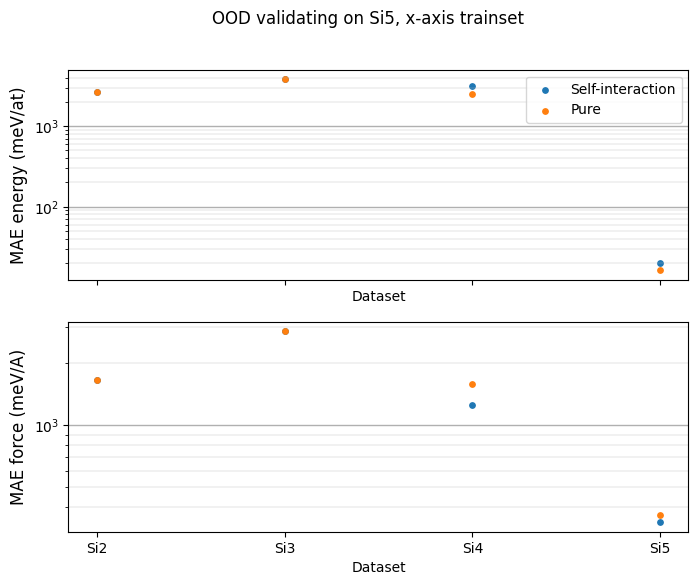

In [5]:
## SIEVING DATA ## 
en_err = errs['val']
en_err_pure = errs_pure['val']
ferrs_err = ferrs['val']
ferrs_err_pure = ferrs_pure['val']
yerr = np.array([en_err['Si2'][0], en_err['Si3'][0], en_err['Si4'][1], en_err['Si5'][2]])
yerr_pure = np.array([en_err_pure['Si2'][0], en_err_pure['Si3'][0], en_err_pure['Si4'][1], en_err_pure['Si5'][2]])
yerr_ferrs = np.array([ferrs_err['Si2'][0], ferrs_err['Si3'][0], ferrs_err['Si4'][1], ferrs_err['Si5'][2]])
yerr_ferrs_pure = np.array([ferrs_err_pure['Si2'][0], ferrs_err_pure['Si3'][0], ferrs_err_pure['Si4'][1], ferrs_err_pure['Si5'][2]])

## PLOT ## 
x = [2, 3, 4, 5]
xticks = ['Si2', 'Si3', 'Si4', 'Si5']
f,ax = plt.subplots(2,1, figsize=(8,6), dpi=100, sharex=True)
f.suptitle('OOD validating on Si5, x-axis trainset')
ax[0].scatter(x, yerr*1e3, s=15, color='C0', label='Self-interaction')
ax[0].scatter(x, yerr_pure*1e3, s=15, color='C1', label='Pure')
ax[0].set_ylabel('MAE energy (meV/at)', fontsize=12)
ax[0].set_xticks(x)
ax[0].set_xticklabels(xticks)
ax[0].legend()

ax[1].scatter(x, yerr_ferrs*1e3, s=15, color='C0', label='Self-interaction')
ax[1].scatter(x, yerr_ferrs_pure*1e3, s=15, color='C1', label='Pure')
ax[1].set_ylabel('MAE force (meV/A)', fontsize=12)
ax[1].set_xticks(x)
ax[1].set_xticklabels(xticks)

for axes in ax:
    axes.set_xlabel('Dataset')
    axes.grid(axis='y', which='major', linewidth=1)
    axes.grid(axis='y', which='minor', linewidth=0.25)
    axes.set_yscale('log')

#### MAE vs. basis set for diff datasets 

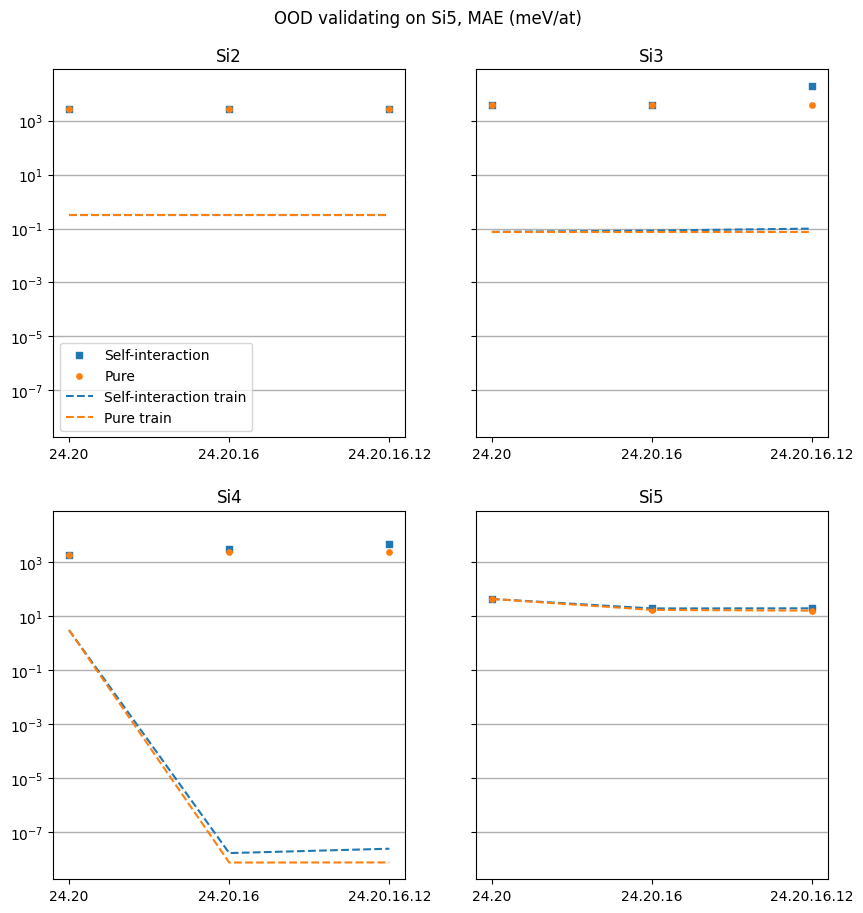

In [86]:
## SIEVING DATA ## 
tr_en_err = errs['train']
tr_en_err_pure = errs_pure['train']
tr_ferrs_err = ferrs['train']
tr_ferrs_err_pure = ferrs_pure['train']

en_err = errs['val']
en_err_pure = errs_pure['val']
ferrs_err = ferrs['val']
ferrs_err_pure = ferrs_pure['val']
# structure is (trainset, basis)
tr_en_err_matrix = np.row_stack([tr_en_err[key] for key in tr_en_err.keys()])
tr_en_err_pure_matrix = np.row_stack([tr_en_err_pure[key] for key in tr_en_err_pure.keys()])
tr_ferrs_err_matrix = np.row_stack([tr_ferrs_err[key] for key in tr_ferrs_err.keys()])
tr_ferrs_err_pure_matrix = np.row_stack([tr_ferrs_err_pure[key] for key in tr_ferrs_err_pure.keys()])

en_err_matrix = np.row_stack([en_err[key] for key in en_err.keys()])
en_err_pure_matrix = np.row_stack([en_err_pure[key] for key in en_err_pure.keys()])
ferrs_err_matrix = np.row_stack([ferrs_err[key] for key in ferrs_err.keys()])
ferrs_err_pure_matrix = np.row_stack([ferrs_err_pure[key] for key in ferrs_err_pure.keys()])


## PLOT ## 
x = [3, 4, 5]
xticks = ['24.20', '24.20.16', '24.20.16.12']
f,ax = plt.subplots(2,2, figsize=(10,10), dpi=100, sharey=True)
f.suptitle('OOD validating on Si5, MAE (meV/at)')
f.subplots_adjust(top=0.92)
trainsets = ['Si2', 'Si3', 'Si4', 'Si5']
for i,axes in enumerate(ax.flatten()):
    axes.set_title(trainsets[i])
    axes.set_xticks(x)
    axes.set_xticklabels(xticks)
    axes.scatter(x, en_err_matrix[i,:]*1e3, s=15, color='C0', marker='s', label='Self-interaction')
    axes.scatter(x, en_err_pure_matrix[i,:]*1e3, s=15, color='C1', label='Pure')
    axes.plot(x, tr_en_err_matrix[i,:]*1e3, color='C0', linestyle='--', label='Self-interaction train')
    axes.plot(x, tr_en_err_pure_matrix[i,:]*1e3, color='C1', linestyle='--', label='Pure train')

    # axes.set_xlabel('Basis-set')
    # axes.set_ylabel('MAE energy (meV/at)', fontsize=12)
    axes.grid(axis='y', which='major', linewidth=1)
    axes.grid(axis='y', which='minor', linewidth=0.25)
    axes.set_yscale('log')
ax.flatten()[0].legend(loc='lower left')

### Dimers

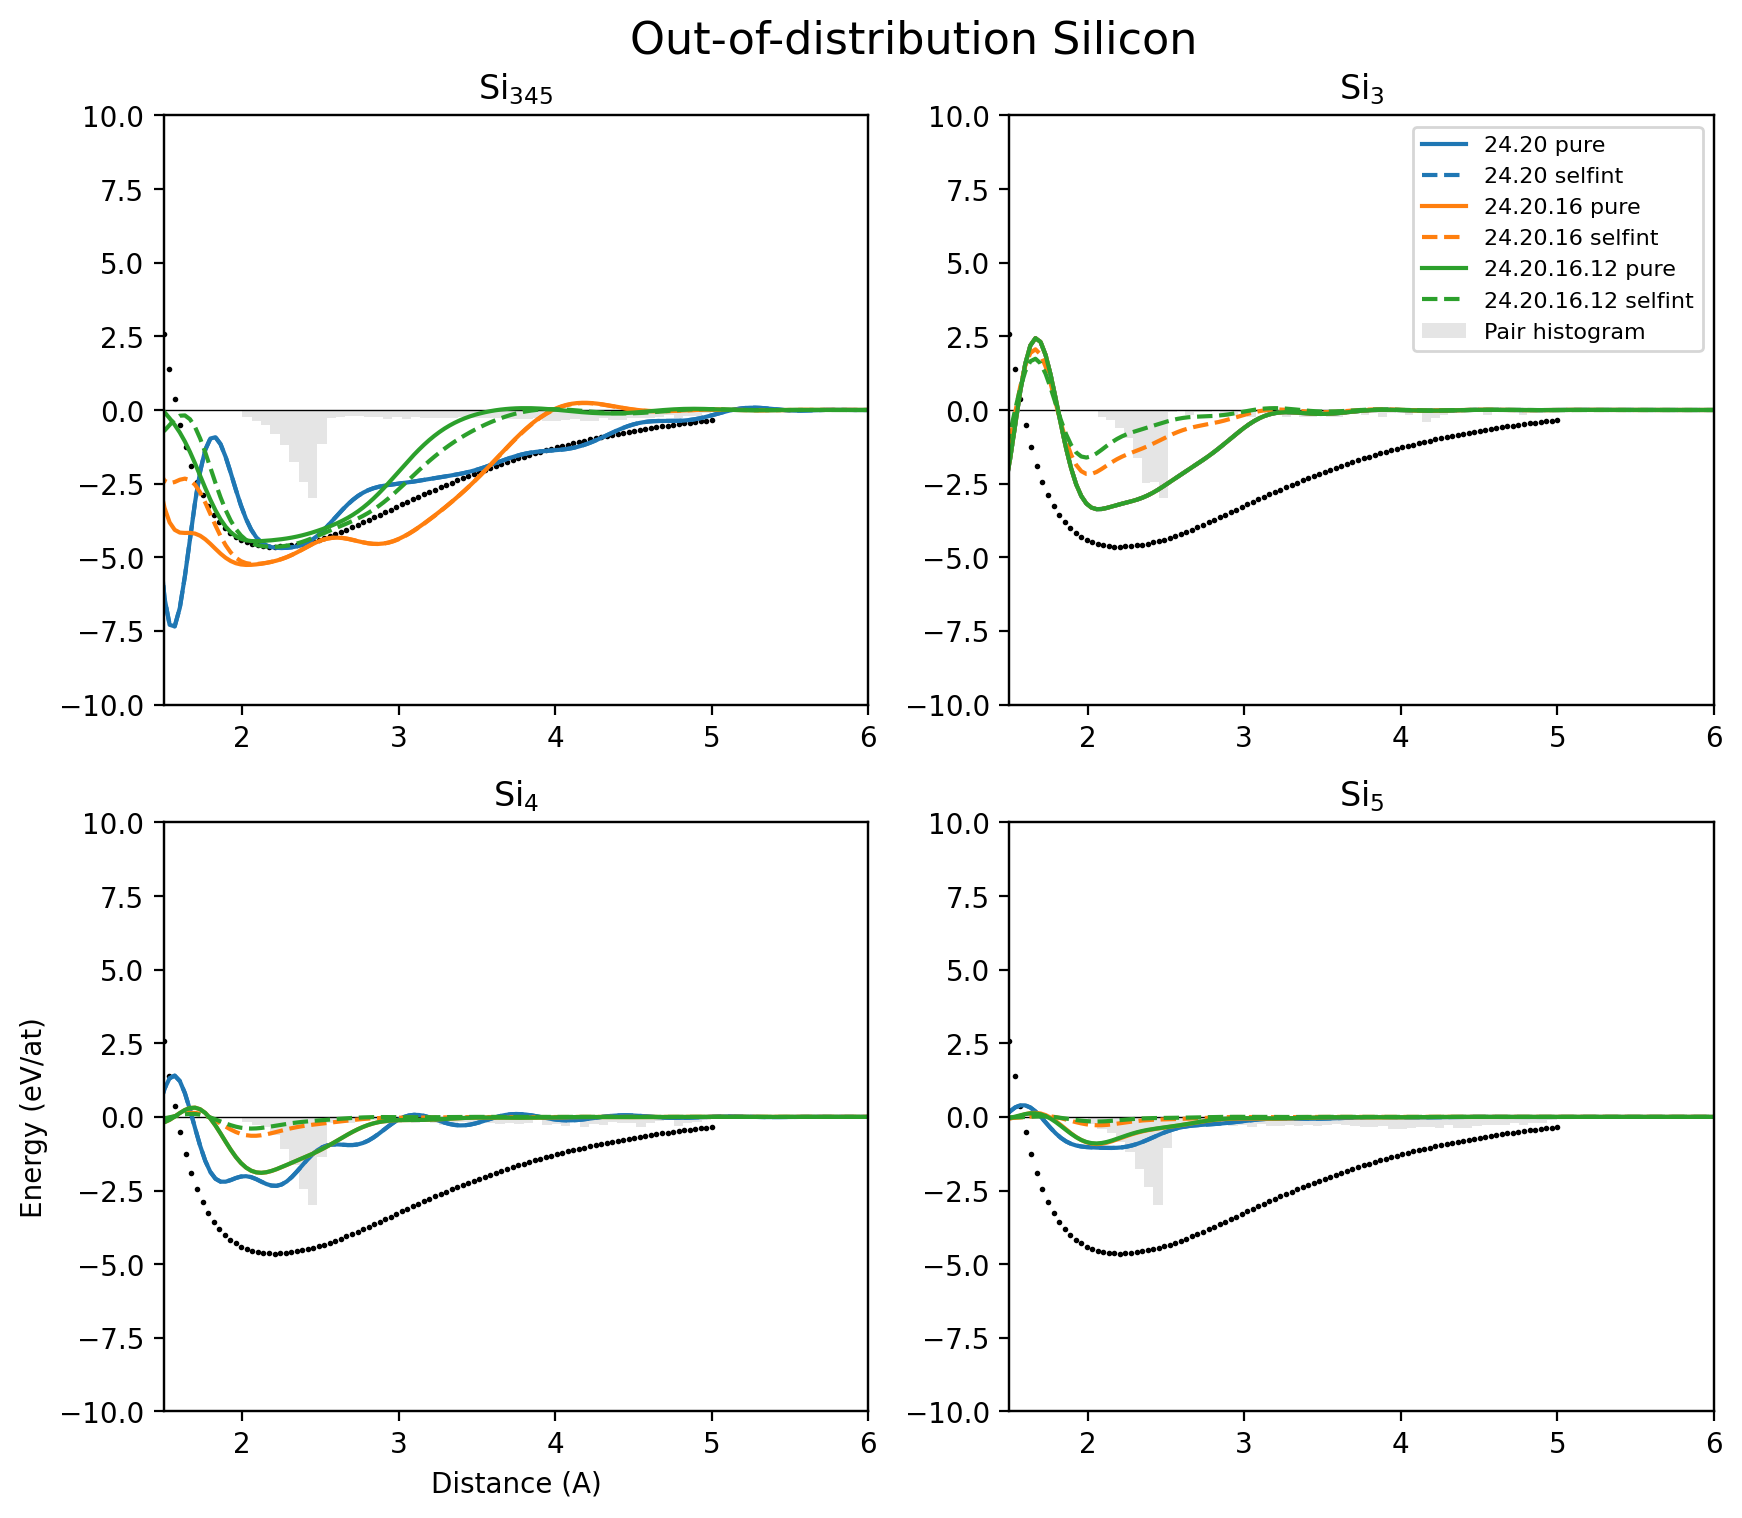

In [2]:
en_si = np.loadtxt('./datasets/Si2_energy.dat').T

g,gax = plt.subplots(2,2, figsize=(10,8), dpi=200)
g.suptitle(r'Out-of-distribution Silicon', fontsize=16)
g.subplots_adjust(top=0.92, hspace=0.2)
basis_tags = ['24.20', '24.20.16', '24.20.16.12']
ecost = 50.0
# dsets = ['Si2', 'Si3', 'Si4', 'Si5']
dsetlabels = [r'Si$_{345}$', r'Si$_3$', r'Si$_4$', r'Si$_5$']
dsets = [r'Si345', r'Si3', r'Si4', r'Si5']
Si_pure = {}
Si_selfint = {}

axes_flat = gax.flatten()
for i, dset in enumerate(dsets):
    axes_flat[i].set_title(f'{dsetlabels[i]}')
    axes_flat[i].set_ylim(-10,10)
    axes_flat[i].set_xlim(np.min(en_si[0]),6)
    axes_flat[i].scatter(*en_si, s=1, color='k')
    axes_flat[i].axhline(0, color='k', lw=0.5)
    # if i != 0:
        # axes_flat[i].set_ylim(-3.5, 3.5)
    bins, counts = np.loadtxt(f'datasets/pair_distributions/{dset}_histogram.dat').T
    # Plot histogram as bar
    axes_flat[i].bar(bins, -counts*3/np.max(counts), width=bins[-1]-bins[-2], bottom=0, align='edge', alpha=0.1, color='k', label='Pair histogram')
    # Add secondary y-axis for the histogram
    ax_hist = axes_flat[i].twinx()
    # ax_hist.set_ylabel('Pair distribution', fontsize=10)
    ax_hist.set_ylim(-np.max(counts)*3/np.max(counts), 0)
    ax_hist.set_yticks([])
    for j, basis in enumerate(basis_tags):
        # Load
        Si_pure[dset+'_'+basis] = np.loadtxt(f'acejulia/{dset}_purify/' + basis + f'/ecost{ecost}/dimercurve.dat').T
        Si_selfint[dset+'_'+basis] = np.loadtxt(f'acejulia/{dset}/' + basis + f'/ecost{ecost}/dimercurve.dat').T
        # Plot
        axes_flat[i].plot(*Si_pure[dset+'_'+basis], label=basis+' pure', color='C'+str(j))
        axes_flat[i].plot(*Si_selfint[dset+'_'+basis], label=basis+' selfint', color='C'+str(j), linestyle='--')
axes_flat[1].legend(fontsize=8, loc='upper right')
axes_flat[2].set_ylabel('Energy (eV/at)', fontsize=10)
axes_flat[2].set_xlabel('Distance (A)', fontsize=10)
g.savefig('figures/ood_silicon_dimer.png', dpi=300, bbox_inches='tight')



## In-domain Test

### Coefficients

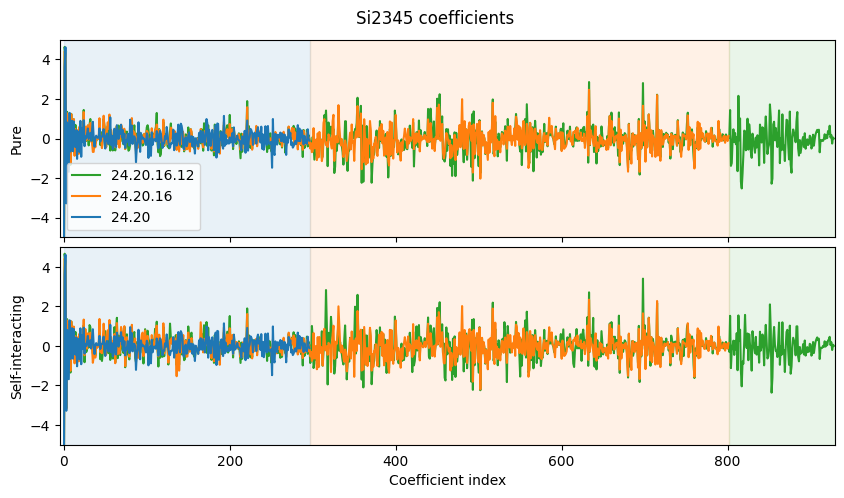

In [7]:
# Purified # 
with open('acejulia/Si_purify_inD_coeffs.dat', 'r') as file:
    lines = file.readlines()
coeffs_pure = {'Si23': [], 'Si234': [], 'Si2345': []}
for i, line in enumerate(lines):
    line_list = ast.literal_eval(line)
    if i<3:
        coeffs_pure['Si23'].append(line_list)
    elif i<6:
        coeffs_pure['Si234'].append(line_list)
    else:
        coeffs_pure['Si2345'].append(line_list)

# Self-interacting # 
with open('acejulia/Si_selfint_inD_coeffs.dat', 'r') as file:
    lines = file.readlines()
coeffs = {'Si23': [], 'Si234': [], 'Si2345': []}
for i, line in enumerate(lines):
    line_list = ast.literal_eval(line)
    if i<3:
        coeffs['Si23'].append(line_list)
    elif i<6:
        coeffs['Si234'].append(line_list)
    else:
        coeffs['Si2345'].append(line_list)

# Checking similarity # 
dset = 'Si2345'
f,ax = plt.subplots(2,1, figsize=(10,5), dpi=100, sharex=True)
f.subplots_adjust(top=0.92, hspace=0.05); f.suptitle(f'{dset} coefficients')
ax[0].set_ylabel('Pure'); ax[1].set_ylabel('Self-interacting')
ax[0].plot(coeffs_pure[dset][2], label='24.20.16.12', color='C2')
ax[0].plot(coeffs_pure[dset][1], label='24.20.16', color='C1')
ax[0].plot(coeffs_pure[dset][0], label='24.20', color='C0')
ax[1].plot(coeffs[dset][2], label='24.20.16.12', color='C2')
ax[1].plot(coeffs[dset][1], label='24.20.16', color='C1')
ax[1].plot(coeffs[dset][0], label='24.20', color='C0')
for axes in ax:
    axes.axvspan(0, 297, color='C0', alpha=0.1)
    axes.axvspan(297, 802, color='C1', alpha=0.1)
    axes.axvspan(802, 929, color='C2', alpha=0.1)
    axes.set_xlim(-5,929); axes.set_ylim(-5,5)
ax[0].legend()
ax[1].set_xlabel('Coefficient index')
f.savefig(f'figures/{dset}_coeffs.png', dpi=300, bbox_inches='tight')

(0.0, 24.0)

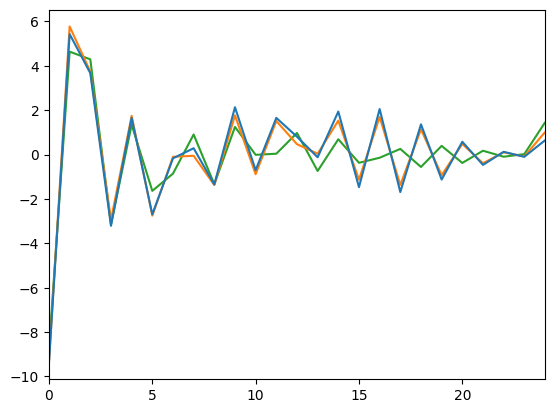

In [ ]:
a = coeffs_pure['Si23'][0]
b = coeffs_pure['Si234'][1]
c = coeffs_pure['Si2345'][2]


plt.plot(c, color='C2')
plt.plot(b, color='C1')
plt.plot(a, color='C0')
plt.xlim(0,24)

In [117]:
# plt.plot(np.array(coeffs_pure['Si234'][1][297:802]) - np.array(coeffs_pure['Si234'][2][297:802]))

### Errors

#### Data load

In [73]:
# MAE # 
errs = {}
errs['train'] = {'Si23': [], 'Si234': [], 'Si2345': []}
errs['val'] = {'Si23': [], 'Si234': [], 'Si2345': []}
errs['train']['Si23'] = [0.0003189446304213561, 0.00031510721108588766, 0.00031473502299377286]
errs['train']['Si234'] = [0.012823928401797578, 0.00030467564776699875,  0.00030326815984153653]
errs['train']['Si2345'] = [0.06283192872027485, 0.011172733801797676, 0.006813574792344071]

errs['val']['Si23'] = [0.7314496303867745, 2.145457214576374, 5.201990817811364]
errs['val']['Si234'] = [0.5542576591895013, 0.6402825581082853,  0.5059191758755059]
errs['val']['Si2345'] = [0.04646340991892066, 0.011582635910943282, 0.009026467482877706]


errs_pure = {}
errs_pure['train'] = {'Si23': [], 'Si234': [], 'Si2345': []}
errs_pure['val'] = {'Si23': [], 'Si234': [], 'Si2345': []}
errs_pure['train']['Si23'] = [0.0003189446304213561, 0.00031510721108588766, 0.0003147350223389367]
errs_pure['train']['Si234'] = [0.012823928401797578, 0.00030467564776699875, 0.0003032681587076998]
errs_pure['train']['Si2345'] = [0.06283192872027485, 0.011172733801797676, 0.006813574802081348]

errs_pure['val']['Si23'] = [0.7314493916057563, 0.7314494996472295, 0.7314496311553558]
errs_pure['val']['Si234'] = [0.5542576591918005, 0.7598177556880328, 0.7598177346910779]
errs_pure['val']['Si2345'] = [0.046463409918951586, 0.01156226949635493, 0.008962682054469042]

# MAE # 
ferrs = {}
ferrs['train'] = {'Si23': [], 'Si234': [], 'Si2345': []}
ferrs['val'] = {'Si23': [], 'Si234': [], 'Si2345': []}
ferrs['train']['Si23'] = [0.010347197346083458, 0.010224281927640713, 0.010215513230177633]
ferrs['train']['Si234'] = [0.268123466231014, 0.01735149742814704, 0.017074917681626868]
ferrs['train']['Si2345'] = [0.4434120400086316, 0.27871369480902275, 0.23009000284029432]

ferrs['val']['Si23'] = [5.202882369477908, 8.785332757678953, 10.867899320684742]
ferrs['val']['Si234'] = [1.1525539959336513, 2.9861313822092117, 3.941926090041813]
ferrs['val']['Si2345'] = [0.4900724250143046, 0.309479880769104, 0.27748206529634856]


ferrs_pure = {}
ferrs_pure['train'] = {'Si23': [], 'Si234': [], 'Si2345': []}
ferrs_pure['val'] = {'Si23': [], 'Si234': [], 'Si2345': []}
ferrs_pure['train']['Si23'] = [0.010347197342848648, 0.01034719733562278, 0.010347197346557126]
ferrs_pure['train']['Si234'] = [0.26812346623277344, 0.017291320690499955, 0.017291320687248105]
ferrs_pure['train']['Si2345'] = [0.4434120400091624, 0.27869627411419673, 0.22856815917391504]

ferrs_pure['val']['Si23'] = [5.202882206225266, 5.202882370789215, 5.202882452351486]
ferrs_pure['val']['Si234'] = [1.1525539959956859, 3.628515785410515, 3.628515824311212]
ferrs_pure['val']['Si2345'] = [0.490072425014623, 0.30930696936371477, 0.2761654992913551]

#### MAE vs. dataset

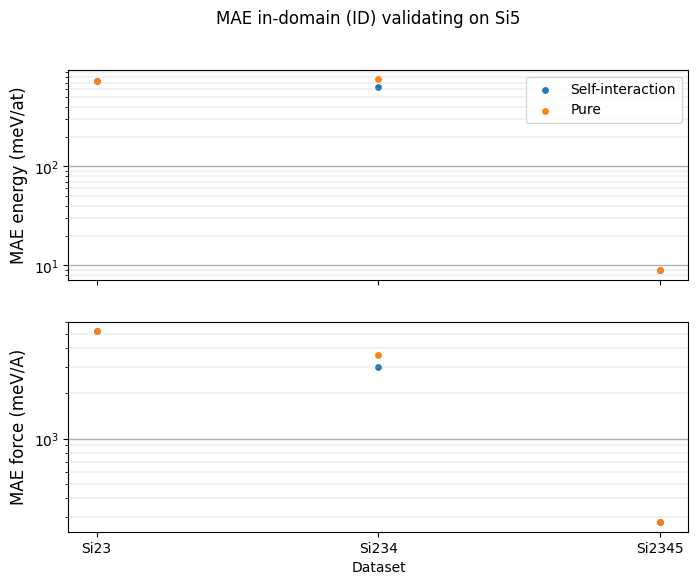

In [76]:
## SIEVING DATA ## 
en_err = errs['val']
en_err_pure = errs_pure['val']
ferrs_err = ferrs['val']
ferrs_err_pure = ferrs_pure['val']
yerr = np.array([en_err['Si23'][0], en_err['Si234'][1], en_err['Si2345'][2]])
yerr_pure = np.array([en_err_pure['Si23'][0], en_err_pure['Si234'][1], en_err_pure['Si2345'][2]])
yerr_ferrs = np.array([ferrs_err['Si23'][0], ferrs_err['Si234'][1], ferrs_err['Si2345'][2]])
yerr_ferrs_pure = np.array([ferrs_err_pure['Si23'][0], ferrs_err_pure['Si234'][1], ferrs_err_pure['Si2345'][2]])


## PLOT ## 
x = [3, 4, 5]
xticks = ['Si23', 'Si234', 'Si2345']
f,ax = plt.subplots(2,1, figsize=(8,6), dpi=100, sharex=True)
f.suptitle('MAE in-domain (ID) validating on Si5')
ax[0].scatter(x, yerr*1e3, s=15, color='C0', label='Self-interaction')
ax[0].scatter(x, yerr_pure*1e3, s=15, color='C1', label='Pure')
ax[0].set_ylabel('MAE energy (meV/at)', fontsize=12)
ax[0].set_xticks(x)
ax[0].set_xticklabels(xticks)
ax[0].legend()

ax[1].scatter(x, yerr_ferrs*1e3, s=15, color='C0', label='Self-interaction')
ax[1].scatter(x, yerr_ferrs_pure*1e3, s=15, color='C1', label='Pure')
ax[1].set_ylabel('MAE force (meV/A)', fontsize=12)
ax[1].set_xticks(x)
ax[1].set_xticklabels(xticks)
ax[1].set_xlabel('Dataset')
for axes in ax:
    axes.grid(axis='y', which='major', linewidth=1)
    axes.grid(axis='y', which='minor', linewidth=0.25)
    axes.set_yscale('log')

#### MAE vs. basis set for diff datasets

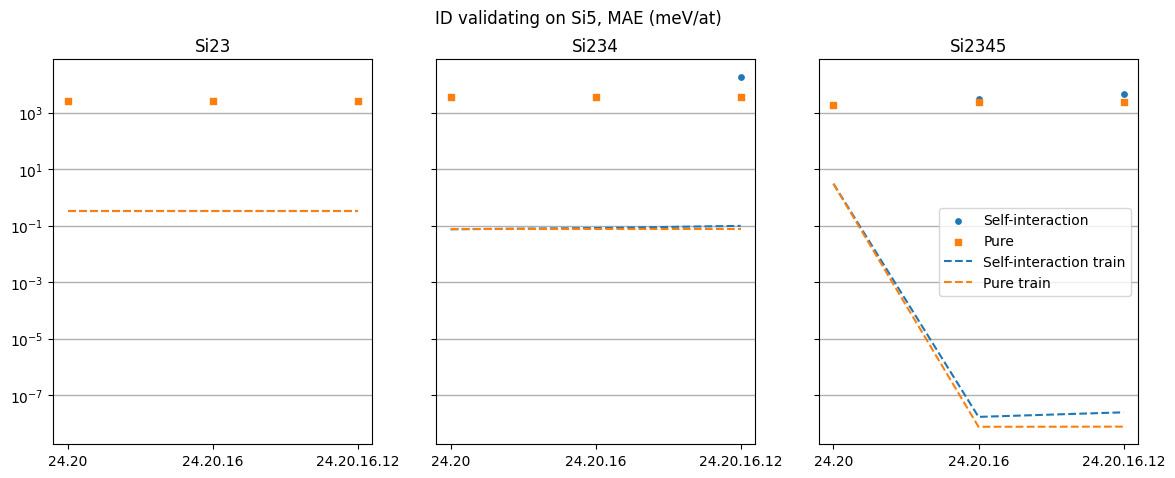

In [39]:
## SIEVING DATA ## 
tr_en_err = errs['train']
tr_en_err_pure = errs_pure['train']
tr_ferrs_err = ferrs['train']
tr_ferrs_err_pure = ferrs_pure['train']

en_err = errs['val']
en_err_pure = errs_pure['val']
ferrs_err = ferrs['val']
ferrs_err_pure = ferrs_pure['val']
# structure is (trainset, basis)
tr_en_err_matrix = np.row_stack([tr_en_err[key] for key in tr_en_err.keys()])
tr_en_err_pure_matrix = np.row_stack([tr_en_err_pure[key] for key in tr_en_err_pure.keys()])
tr_ferrs_err_matrix = np.row_stack([tr_ferrs_err[key] for key in tr_ferrs_err.keys()])
tr_ferrs_err_pure_matrix = np.row_stack([tr_ferrs_err_pure[key] for key in tr_ferrs_err_pure.keys()])

en_err_matrix = np.row_stack([en_err[key] for key in en_err.keys()])
en_err_pure_matrix = np.row_stack([en_err_pure[key] for key in en_err_pure.keys()])
ferrs_err_matrix = np.row_stack([ferrs_err[key] for key in ferrs_err.keys()])
ferrs_err_pure_matrix = np.row_stack([ferrs_err_pure[key] for key in ferrs_err_pure.keys()])

## PLOT ## 
x = [3, 4, 5]
xticks = ['24.20', '24.20.16', '24.20.16.12']
f,ax = plt.subplots(1,3, figsize=(14,5), dpi=100, sharey=True)
f.suptitle('ID validating on Si5, MAE (meV/at)')
trainsets = ['Si23', 'Si234', 'Si2345']
for i,axes in enumerate(ax.flatten()):
    axes.set_title(trainsets[i])
    axes.set_xticks(x)
    axes.set_xticklabels(xticks)
    axes.scatter(x, en_err_matrix[i,:]*1e3, s=15, marker='o', color='C0', label='Self-interaction')
    axes.scatter(x, en_err_pure_matrix[i,:]*1e3, s=15, marker='s', color='C1', label='Pure')
    axes.plot(x, tr_en_err_matrix[i,:]*1e3, color='C0', linestyle='--', label='Self-interaction train')
    axes.plot(x, tr_en_err_pure_matrix[i,:]*1e3, color='C1', linestyle='--', label='Pure train')

#     # axes.set_xlabel('Basis-set')
    # axes.set_ylabel('MAE energy (meV/at)', fontsize=12)
    axes.grid(axis='y', which='major', linewidth=1)
    axes.grid(axis='y', which='minor', linewidth=0.25)
    axes.set_yscale('log')
ax.flatten()[-1].legend()

### Dimers

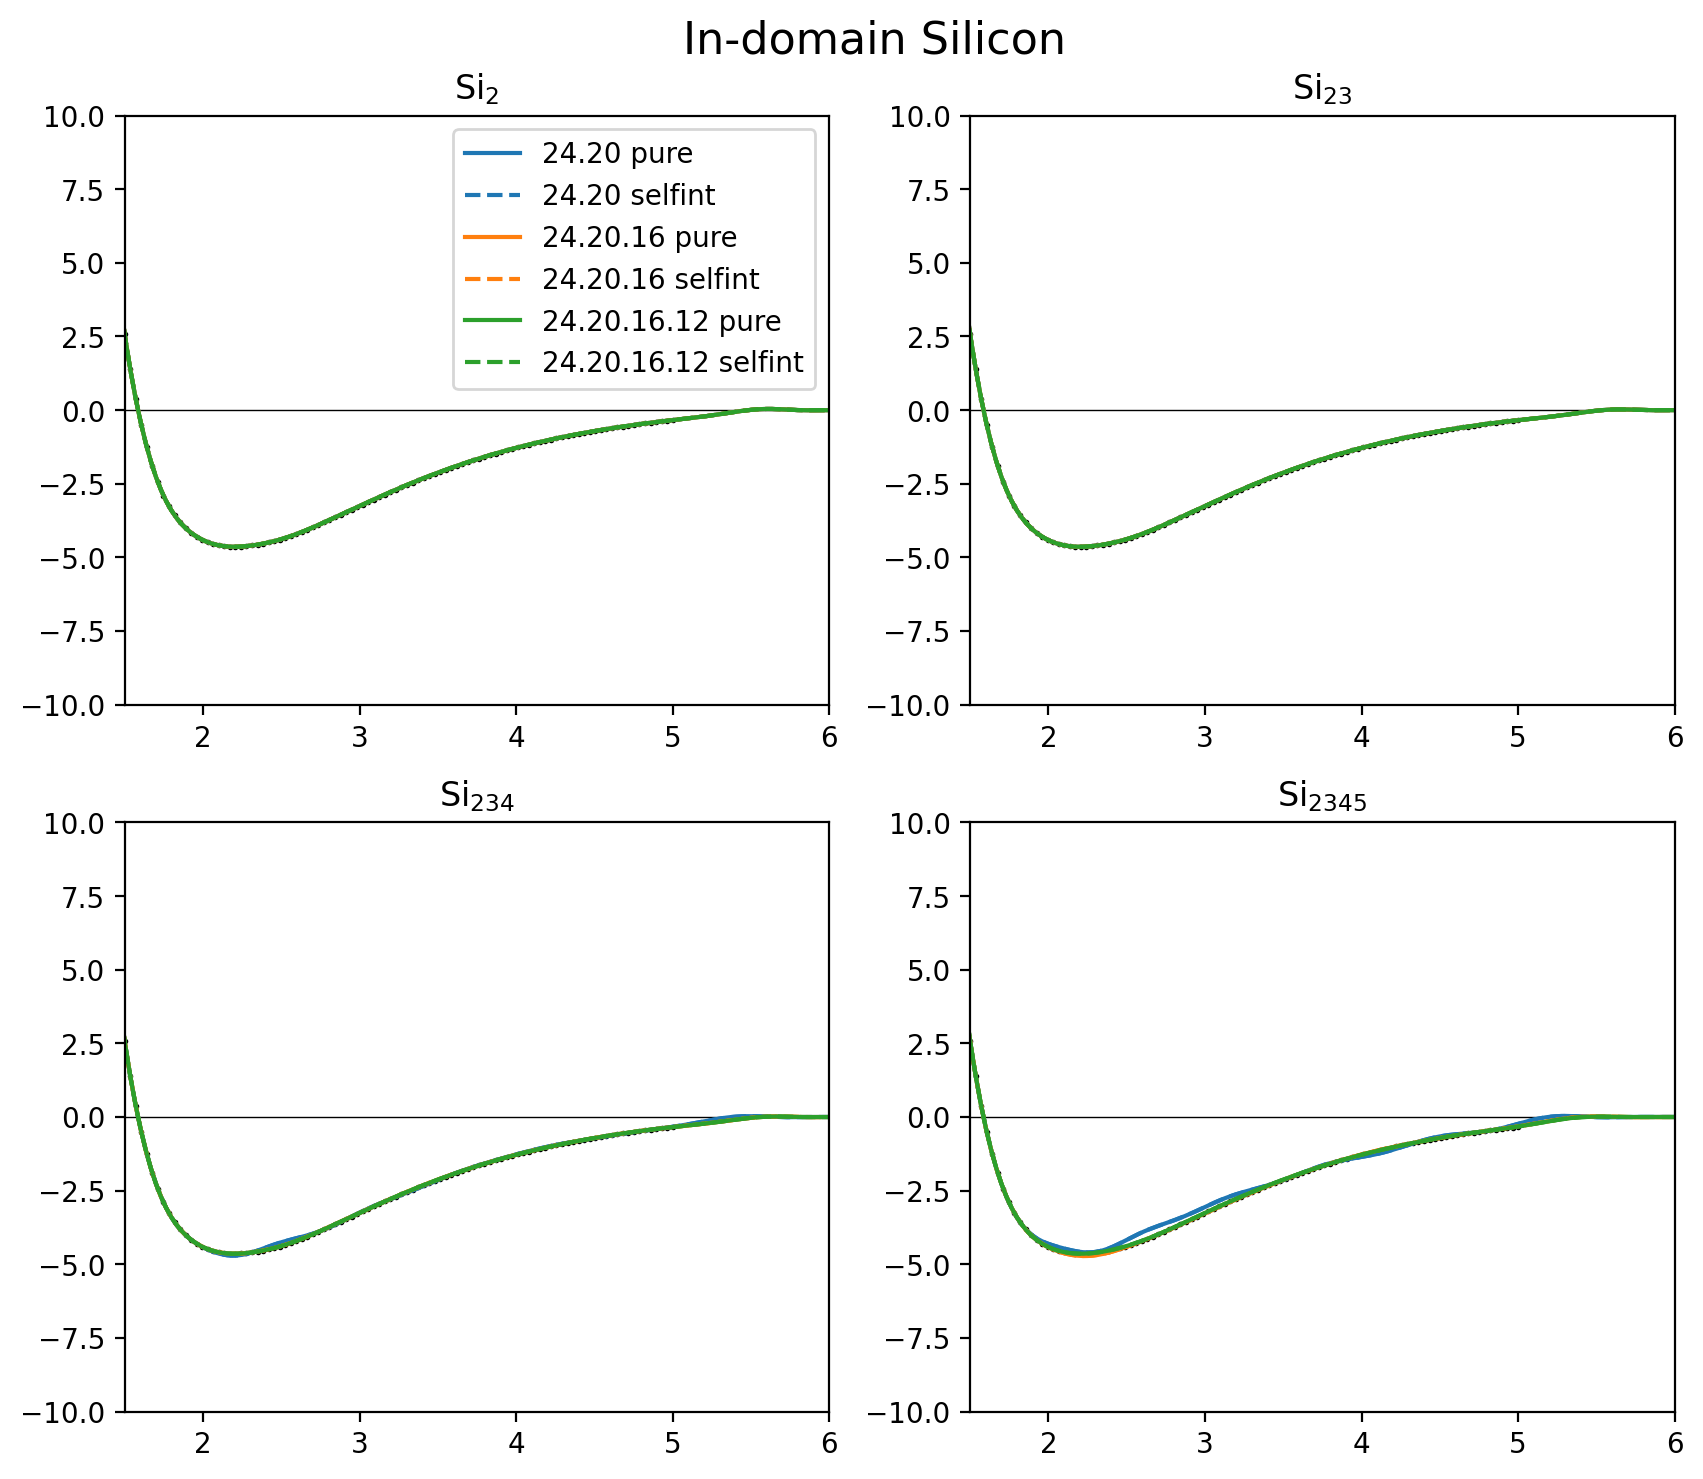

In [70]:
g,gax = plt.subplots(2,2, figsize=(10,8), dpi=200)
g.suptitle('In-domain Silicon', fontsize=16)
g.subplots_adjust(top=0.92, hspace=0.2)
basis_tags = ['24.20', '24.20.16', '24.20.16.12']
ecost = 50.0
dsets = ['Si2', 'Si23', 'Si234', 'Si2345']
dsetlabels = [r'Si$_{2}$', r'Si$_{23}$', r'Si$_{234}$', r'Si$_{2345}$']
Si_pure = {}
Si_selfint = {}

axes_flat = gax.flatten()
for i, dset in enumerate(dsets):
    axes_flat[i].set_title(dsetlabels[i])
    axes_flat[i].set_ylim(-10,10)
    axes_flat[i].set_xlim(np.min(en_si[0]),6)
    axes_flat[i].scatter(*en_si, s=1, color='k')
    axes_flat[i].axhline(0, color='k', lw=0.5)
    for j, basis in enumerate(basis_tags):
        # Load
        Si_pure[dset+'_'+basis] = np.loadtxt(f'acejulia/{dset}_purify/' + basis + f'/ecost{ecost}/dimercurve.dat').T
        Si_selfint[dset+'_'+basis] = np.loadtxt(f'acejulia/{dset}/' + basis + f'/ecost{ecost}/dimercurve.dat').T
        # Plot
        axes_flat[i].plot(*Si_pure[dset+'_'+basis], label=basis+' pure', color='C'+str(j))
        axes_flat[i].plot(*Si_selfint[dset+'_'+basis], label=basis+' selfint', color='C'+str(j), linestyle='--')
axes_flat[0].legend(fontsize=10)
g.savefig('figures/ind_silicon_dimer.png', dpi=300, bbox_inches='tight')

# Morse relabeling

## Dimer set

In [52]:
def morse_potential(r, a=8.57696795, b=2.00550983, c=1.28317311, d=-8.57696795):
    return a * (1 - np.exp(-b * (r - c)))**2 + d

morse_data = load_gzip('datasets/Tr124_dim_morse.pckl.gzip')
r = []
en = []
for i,atoms in enumerate(morse_data['ase_atoms']):
    r.append(np.linalg.norm(atoms.get_positions()))
    en.append(morse_data['energy'][i])
r = np.array(r)
rsorted = np.sort(r)
rlin = np.linspace(np.min(r), np.max(r), 1000)

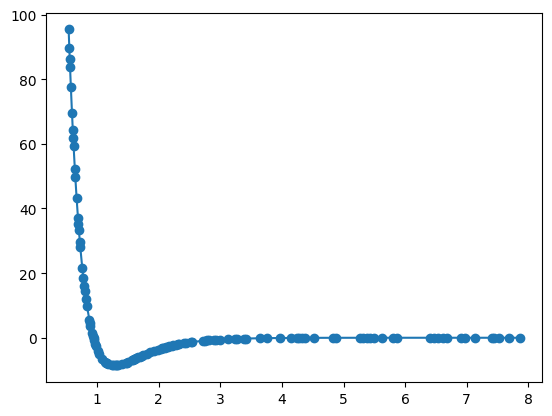

In [53]:
plt.scatter(r, en, label='Morse relabel')
plt.plot(rsorted,morse_potential(rsorted))

## `Tr1k_n`

In [71]:

import scipy.special as sp
## Cutoff functions
def y(r,rcut,delta):
    
    a,b,c = 1.875,-1.25,0.375
    x_arg = 1 - 2*(1 + (r-rcut)/delta)
    return a*x_arg + b*x_arg**3 + c*x_arg**5 

def f(r,rcut,delta):
    return np.piecewise(r, [r<(rcut-delta),(r>(rcut-delta))*(r<rcut), r>rcut], [lambda r: 1,lambda r: 0.5*(1+y(r,rcut,delta)),lambda r:0])

## Radial basis functions
def ChebExpCos(r,k,rcut,lamb):
    # 1st kind Chebyshev poly. with cosine envelope 
    x_chebexp = 1 - 2*((np.exp(-1*lamb*(r/rcut-1))-1)/(np.exp(lamb)-1)) # scaling length
    if k==0:
        return 0.5 * (1 + np.cos(np.pi*r/rcut))
    else: 
        return 0.25*(1 - sp.eval_chebyt(k,x_chebexp))*(1 + np.cos(np.pi*r/rcut))
def ChebExpCos_fcut(r,k,rcut,lamb,delta): # includes shifting and scaling 
    # second f(r,rcut,delta) are values for inner cutoff
    # return ChebExpCos(r,k,rcut,lamb) * f(r,rcut,delta) * (1 - f(r,rcut=0.01,delta=0.005))
    return ChebExpCos(r,k,rcut,lamb) * f(r,rcut,delta)

(0.0, 1.0)

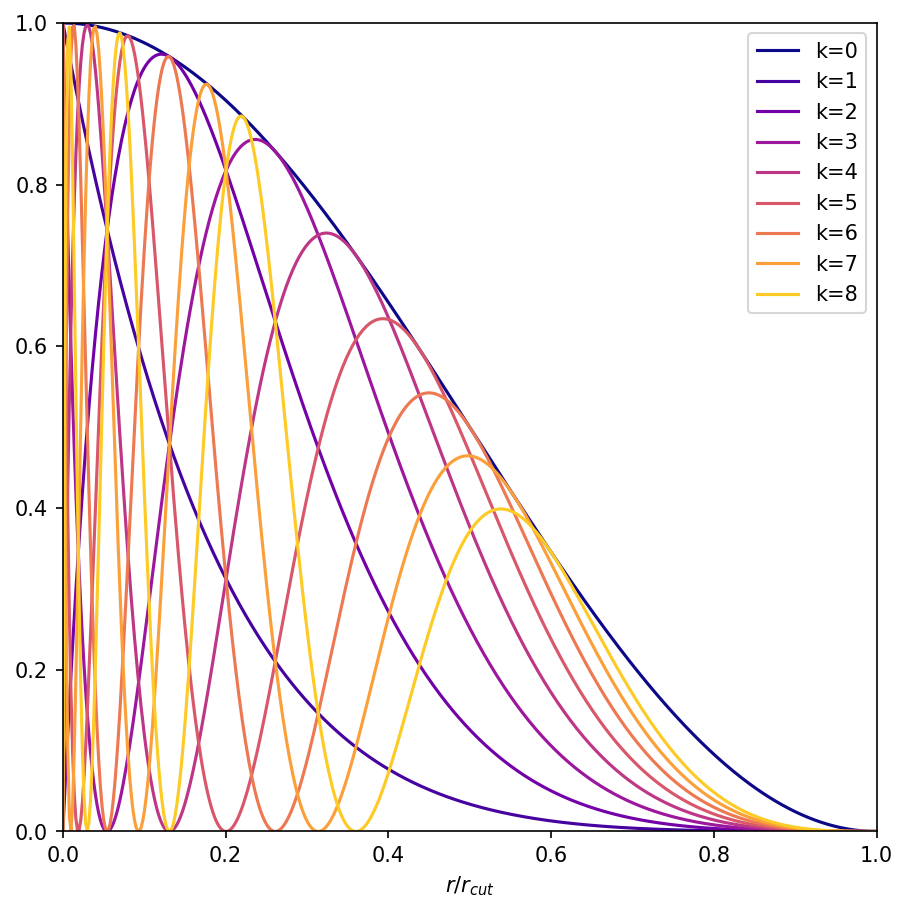

In [80]:
## data
rcut = 5
r = np.linspace(0,rcut,500)
delta = 0.01
kset = np.arange(9)

h,axes = plt .subplots(1,1,sharex=True,figsize=(7,7),dpi=150)
h.subplots_adjust(hspace=0)
for k in kset:
    axes.plot(r/rcut,ChebExpCos_fcut(r,k,rcut=5,lamb=5.25,delta=0.1),label='k=%i'%k,color=cm.plasma(k/len(kset)))
    # axes.plot(r/rcut,ChebExpCos_fcut(r,k,rcut=5,lamb=5.25),label='k=%i'%k,color=cm.plasma(k/len(kset)))
# plt .plot(r,(1+np.cos(np.pi*r/rcut)))
axes.legend()
axes.set_xlabel(r'$r/r_{cut}$')
axes.set_ylim(0,1)
axes.set_xlim(0,1)
# for i,ax in enumerate(axes):
#     ax.set_xlim(0,1)
#     ax.set_ylim(0,1)
#     ax.set_ylabel(r'$g_k(r)$')

In [54]:
# g,gax = plt.subplots(2,2, figsize=(10,8), dpi=200)
# g.suptitle('In-domain Silicon', fontsize=16)
# g.subplots_adjust(top=0.92, hspace=0.2)
# basis_tags = ['24.20', '24.20.16', '24.20.16.12']
# ecost = 50.0
# dsets = ['Si2', 'Si23', 'Si234', 'Si2345']
# dsetlabels = [r'Si$_{2}$', r'Si$_{23}$', r'Si$_{234}$', r'Si$_{2345}$']
# Si_pure = {}
# Si_selfint = {}

# axes_flat = gax.flatten()
# for i, dset in enumerate(dsets):
#     axes_flat[i].set_title(dsetlabels[i])
#     axes_flat[i].set_ylim(-10,10)
#     axes_flat[i].set_xlim(np.min(en_si[0]),6)
#     axes_flat[i].scatter(*en_si, s=1, color='k')
#     axes_flat[i].axhline(0, color='k', lw=0.5)
#     for j, basis in enumerate(basis_tags):
#         # Load
#         Si_pure[dset+'_'+basis] = np.loadtxt(f'acejulia/{dset}_purify/' + basis + f'/ecost{ecost}/dimercurve.dat').T
#         Si_selfint[dset+'_'+basis] = np.loadtxt(f'acejulia/{dset}/' + basis + f'/ecost{ecost}/dimercurve.dat').T
#         # Plot
#         axes_flat[i].plot(*Si_pure[dset+'_'+basis], label=basis+' pure', color='C'+str(j))
#         axes_flat[i].plot(*Si_selfint[dset+'_'+basis], label=basis+' selfint', color='C'+str(j), linestyle='--')
# axes_flat[0].legend(fontsize=10)
# g.savefig('figures/ind_silicon_dimer.png', dpi=300, bbox_inches='tight')

In [64]:
1.286958464 / 0.529177

2.432

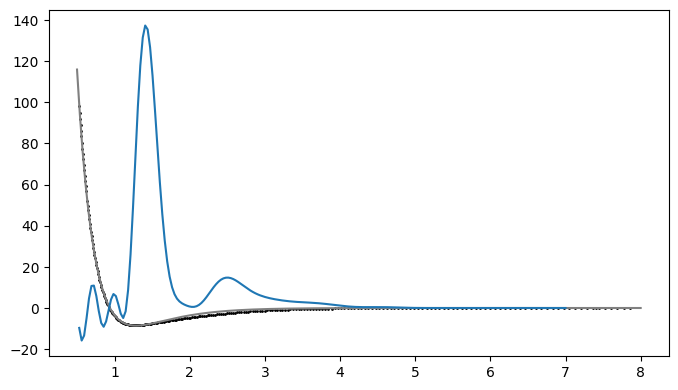

In [62]:
r = np.linspace(0.5,8,200)
en_qe = np.loadtxt('../codefiles_Convergence-of-body-orders-in-linear-ace/datafiles/es01_dimer250.dat').T
en_qe[0] *= 0.529177 # bohr to Angstrom
en_qe[1] -= -18.03977639 * 2 # remove e1b
en_qe[1] *= 13.605703976 # Rydberg to eV
pot_2420 = np.loadtxt('acejulia/Tr1k_n_morse/24.20/ecost50.0/dimercurve_LSQR.dat').T

f,ax = plt.subplots(1,1, figsize=(8,4.5), dpi=100)
ax.scatter(*en_qe, s=1, color='k', label='DFT')
ax.plot(r, morse_potential(r), label='Morse potential', color='gray')
ax.plot(*pot_2420, label='24.20 ACE', color='C0')
# ax.set_ylim(-10,6)